In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing, metrics

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


df_15_16 = pd.read_csv('data/bb_data_15_16.csv')
df_17 = pd.read_csv('data/bb_data_17.csv')
df_15_16 = df_15_16[list(df_15_16.columns[1:])]
df_17 = df_17[list(df_17.columns[1:])]
df_17.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent,avg_angle
0,Aaron Judge,Yankees,84.0,366.0,30.0,75.0,66.0,6.0,16.7,29.8,...,44.8,80.6,68.2,40.6,59.6,13.2,96.2,49.0,25.5,17.497848
1,Jose Altuve,Astros,86.0,380.0,13.0,62.0,50.0,18.0,9.7,12.1,...,76.5,91.4,85.3,41.1,67.4,6.8,85.3,21.0,7.2,10.461872
2,Mookie Betts,Red Sox,86.0,399.0,16.0,61.0,53.0,15.0,10.5,8.3,...,75.8,92.3,86.9,44.7,56.4,4.8,88.6,15.0,4.7,13.639279
3,Anthony Rendon,Nationals,81.0,339.0,16.0,46.0,54.0,5.0,14.2,13.9,...,75.3,92.3,87.7,46.6,59.9,5.1,89.9,18.0,7.5,21.013647
4,Paul Goldschmidt,Diamondbacks,88.0,381.0,20.0,73.0,67.0,13.0,15.0,20.2,...,66.5,80.2,76.0,45.4,59.3,10.4,92.2,32.0,13.3,15.365616


In [2]:
df_15_16.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent,avg_angle
0,Mike Trout,Angels,159.0,681.0,29.0,123.0,100.0,30.0,17.0,20.1,...,70.6,87.0,81.4,42.3,55.8,7.1,90.8,61,14.6,11.654219
1,Kris Bryant,Cubs,155.0,699.0,39.0,121.0,102.0,8.0,10.7,22.0,...,59.8,81.1,73.3,41.6,59.8,13.0,89.3,54,11.9,23.803787
2,Mookie Betts,Red Sox,158.0,730.0,31.0,122.0,113.0,26.0,6.7,11.0,...,71.6,94.8,87.3,47.6,60.8,5.2,89.6,31,5.2,16.929376
3,Josh Donaldson,Blue Jays,155.0,700.0,37.0,122.0,99.0,7.0,15.6,17.0,...,63.3,83.7,76.7,41.5,57.0,9.7,92.0,58,12.5,15.540617
4,Corey Seager,Dodgers,157.0,687.0,26.0,105.0,72.0,3.0,7.9,19.4,...,59.4,88.4,78.6,44.3,60.8,11.3,90.9,41,8.3,10.787186


In [3]:
print(list(df_15_16.columns))

['Name', 'Team', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def', 'WAR', 'OPS', 'GB_per_FB', 'LD_p', 'GB_p', 'FB_p', 'IFFB_p', 'HR_per_FB', 'IFH', 'IFH_p', 'BUH', 'BUH_p', 'Pull_p', 'Cent_p', 'Oppo_p', 'Soft_p', 'Med_p', 'Hard_p', 'O-Swing_p', 'Z-Swing_p', 'Swing_p', 'O-Contact_p', 'Z-Contact_p', 'Contact_p', 'Zone_p', 'F-Strike_p', 'SwStr_p', 'avg_hit_speed', 'barrels', 'brl_percent', 'avg_angle']


### Old School Stats:

1. AVG
2. R
3. RBI
4. HR
4. SB

### Less Old School:

1. OBP
2. SLG
2. ISO
4. BB%
5. K%

### Today (since 2015):

1. Exit Velocity
2. Launch Angle
3. Barrels/PA

In [21]:
interest_cols = ['WAR', 'OPS' , 'OBP', 'SLG','G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 
                 'ISO', 'BABIP', 'AVG', 'wOBA', 'wRC+', 'BsR', 'Off', 
                 'Def', 'GB_per_FB', 'LD_p', 'GB_p', 'FB_p', 'IFFB_p', 'HR_per_FB', 
                 'IFH', 'IFH_p', 'BUH', 'BUH_p', 'Pull_p', 'Cent_p', 'Oppo_p', 'Soft_p', 'Med_p', 
                 'Hard_p', 'O-Swing_p', 'Z-Swing_p', 'Swing_p', 'O-Contact_p', 'Z-Contact_p', 
                 'Contact_p', 'Zone_p', 'F-Strike_p', 'SwStr_p', 'avg_hit_speed', 'barrels', 
                 'brl_percent', 'avg_angle']
older_cols = ['PA', 'HR', 'R', 'RBI', 'SB']
old_cols = ['PA', 'OPS', 'ISO', 'FB_p']
newer_cols = ['PA', 'avg_hit_speed', 'avg_angle', 'brl_percent', 'HR_per_FB']

In [22]:
df_15_16[interest_cols].corr()

,WAR,OPS,OBP,SLG,G,PA,HR,R,RBI,SB,...,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent,avg_angle
WAR,1.000000,0.729554,0.694118,0.642891,0.303426,0.501040,0.406673,0.712878,0.423905,0.202839,...,0.047594,-0.015572,0.046793,-0.058754,-0.226035,-0.132951,0.282132,0.404291,0.322099,0.118990
OPS,0.729554,1.000000,0.824343,0.950777,0.221871,0.440241,0.692988,0.692724,0.692225,-0.047321,...,-0.093429,-0.152703,-0.125178,-0.359893,-0.398827,0.027981,0.635704,0.712236,0.654487,0.214730
OBP,0.694118,0.824343,1.000000,0.608349,0.119956,0.391857,0.251466,0.597514,0.343465,0.118968,...,0.108937,0.062626,0.131260,-0.197331,-0.459107,-0.272405,0.400367,0.348655,0.310628,-0.039079
SLG,0.642891,0.950777,0.608349,1.000000,0.245404,0.402725,0.833931,0.644135,0.782502,-0.131468,...,-0.190621,-0.248374,-0.247353,-0.396559,-0.307849,0.188344,0.672109,0.807716,0.747567,0.322448
G,0.303426,0.221871,0.119956,0.245404,1.000000,0.810952,0.387425,0.504106,0.454812,0.085217,...,-0.111568,-0.152916,-0.149449,-0.137795,-0.120758,0.119693,0.132626,0.359648,0.227891,0.181052
PA,0.501040,0.440241,0.391857,0.402725,0.810952,1.000000,0.449260,0.778460,0.544843,0.183395,...,0.022711,-0.038595,-0.003790,-0.125353,-0.185494,-0.046966,0.207731,0.425827,0.257600,0.166921
HR,0.406673,0.692988,0.251466,0.833931,0.387425,0.449260,1.000000,0.562335,0.831224,-0.269456,...,-0.404903,-0.476231,-0.489295,-0.441817,-0.273498,0.413156,0.663974,0.905483,0.858798,0.460279
R,0.712878,0.692724,0.597514,0.644135,0.504106,0.778460,0.562335,1.000000,0.541640,0.256650,...,-0.057704,-0.089302,-0.058218,-0.127290,-0.245398,-0.036793,0.320116,0.512156,0.397081,0.154254
RBI,0.423905,0.692225,0.343465,0.782502,0.454812,0.544843,0.831224,0.541640,1.000000,-0.252366,...,-0.181313,-0.269200,-0.267656,-0.387383,-0.277177,0.229839,0.646269,0.805122,0.704592,0.358435
SB,0.202839,-0.047321,0.118968,-0.131468,0.085217,0.183395,-0.269456,0.256650,-0.252366,1.000000,...,0.155238,0.150434,0.178965,0.214127,0.123028,-0.181182,-0.394137,-0.295040,-0.320145,-0.226062


In [23]:
def model(clf, df, cols):
    X = df[cols]
    y = df['WAR']
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    X = pd.DataFrame(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    if clf in [RidgeCV(cv=5), LassoCV(cv=5)]:
        clf.fit(X_train, y_train)
        print(clf.score(X_test, y_test)*100)
    else:
        kf = KFold(n_splits=5)
        print(cross_val_score(clf, X_test, y_test, cv=kf))

In [24]:
def normalize(df, cols):
    norm_df = df[cols]
    target = [x for x in df['WAR']]
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_df = min_max_scaler.fit_transform(norm_df)
    norm_df = pd.DataFrame(norm_df, columns=cols)
    norm_df['WAR'] = target
    return norm_df
    
def conv_cols(cols):
    return 'WAR ~ ' + ' + '.join(cols)

def stat_model(df, cols):
    norm_df = normalize(df, cols)
    y, X = patsy.dmatrices(conv_cols(cols), data=norm_df, return_type="dataframe")
    model = sm.OLS(y, X)
    fit = model.fit()
    return fit.summary()

In [25]:
model(LinearRegression(), df_15_16, older_cols)

[ 0.15333173 -0.16756396  0.17845225  0.27752585  0.61699744]


In [26]:
model(RidgeCV(cv=5), df_15_16, older_cols)

[-0.38492357  0.3219129   0.11969655  0.44080141  0.64506565]


In [27]:
model(LassoCV(cv=5), df_15_16, older_cols)

[ 0.46815206  0.07256195  0.31768494  0.29619071  0.11697833]


In [28]:
stat_model(df_15_16, older_cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WAR   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     62.03
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.51e-43
Time:                        17:58:18   Log-Likelihood:                -501.09
No. Observations:                 285   AIC:                             1014.
Df Residuals:                     279   BIC:                             1036.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0433      0.266     -3.919      0.000        -1.567    -0.519
PA            -1.5747      0.568     -2.771      0.006        -2.694    -0.456
HR            -0.9560      0.720     -1.328      0.185        -2.373     0.461
R              8.3608      0.805     10.387      0.000         6.776     9.945
RBI            2.0515      0.842      2.437      0.015         0.394     3.709
SB             0.6581      0.634      1.038      0.300        -0.590     1.906
==============================================================================
Omnibus:                        1.678   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.716
Skew:                           0.137   Prob(JB):                        0.424
Kurtosis:                       2.736   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
stat_model(df_15_16, old_cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WAR   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     111.0
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.46e-56
Time:                        17:58:18   Log-Likelihood:                -472.20
No. Observations:                 285   AIC:                             954.4
Df Residuals:                     280   BIC:                             972.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.4206      0.305     -4.654      0.000        -2.022    -0.820
PA             1.6799      0.339      4.959      0.000         1.013     2.347
OPS           11.8191      0.893     13.234      0.000        10.061    13.577
ISO           -4.3871      0.827     -5.304      0.000        -6.015    -2.759
FB_p           1.7450      0.587      2.974      0.003         0.590     2.900
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.725
Skew:                           0.119   Prob(JB):                        0.696
Kurtosis:                       3.064   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
stat_model(df_15_16, newer_cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WAR   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     23.37
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.33e-19
Time:                        17:58:18   Log-Likelihood:                -557.76
No. Observations:                 285   AIC:                             1128.
Df Residuals:                     279   BIC:                             1149.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.3820      0.506      0.755      0.451        -0.615     1.379
PA                3.6427      0.428      8.508      0.000         2.800     4.486
avg_hit_speed     0.7053      0.926      0.762      0.447        -1.117     2.528
avg_angle        -0.3322      0.733     -0.453      0.651        -1.776     1.111
brl_percent       1.1795      1.222      0.965      0.335        -1.226     3.585
HR_per_FB         0.5918      1.072      0.552      0.581        -1.517     2.701
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.568
Skew:                           0.070   Prob(JB):                        0.753
Kurtosis:                       2.831   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

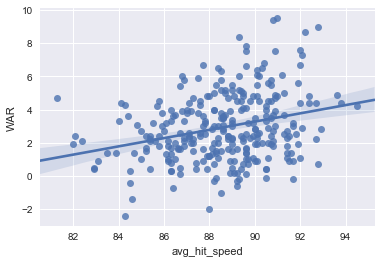

In [31]:
sns.regplot(x='avg_hit_speed', y='WAR', data=df_15_16)

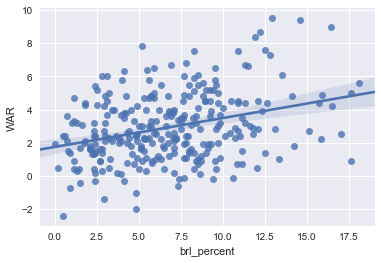

In [32]:
sns.regplot(x='brl_percent', y='WAR', data=df_15_16)

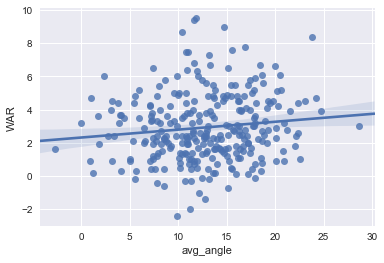

In [33]:
sns.regplot(x='avg_angle', y='WAR', data=df_15_16)

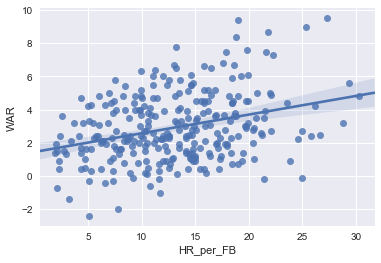

In [35]:
sns.regplot(x='HR_per_FB', y='WAR', data=df_15_16)